<a href="https://colab.research.google.com/github/venidaydream/Intro_to_Big_Data/blob/main/Taller1_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

2.	Usando el fichero viv.csv elabora un modelo de tasación del logaritmo del precio de las viviendas tasadas.


a)	Añade primero como explicativas el logaritmo de la superficie, de la edad y de la variable estudios de los habitantes de la zona. Analiza los resultados


b)	Añade una variable para las características de la vivienda: planta, exterior, calefacción, ascensor y estado de la vivienda. Analiza los resultados


c)	Añade una variable ficticia para el año 2000 y 2001. ¿Cuánto crecieron los precios en esos dos años respecto a 1999?


# Translation

Using the file viv.csv, develop a model for the valuation of the logarithm of the prices of the appraised homes.

a) First, add as explanatory variables the logarithm of the surface area, age, and the education variable of the inhabitants of the area. Analyze the results.


b) Add a variable for the characteristics of the house: floor, exterior, heating, elevator, and the condition of the house. Analyze the results.


c) Add a dummy variable for the years 2000 and 2001. How much did prices grow in these two years compared to 1999?

# Solution

# a) Añade primero como explicativas el logaritmo de la superficie, de la edad y de la variable estudios de los habitantes de la zona. Analiza los resultados

lprecio	lsuperf	ledad	lestudios

We are looking to explain the prices based on superf, age, education.

Null Hypothesis: All predictors (sqft_living, grade_above, bathrooms, north) have no effect on price

Since this is multiple regression, we check Adjusted R-squared

In [16]:
# importando la api de statsmodels
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
# Importando un DataFrame de pandas.
import pandas as pd

In [19]:
df=pd.read_csv('viv.csv')
df

,any,distrito,superf,reforma,estado,edad,ascensor,extint,lprecio,lsuperf,ledad,ati,planta,calef,estudios,lestudios,d00,d01
0,1999,1,35,2,4,50,0,1,16,4,4,0,0,0,8,2,0,0
1,1999,1,48,4,3,60,0,1,16,4,4,0,2,0,8,2,0,0
2,1999,1,38,3,3,90,0,1,16,4,5,0,2,0,8,2,0,0
3,1999,1,46,4,1,90,0,1,16,4,5,0,3,0,8,2,0,0
4,1999,1,55,3,3,35,0,1,16,4,4,0,3,0,8,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5862,2001,10,101,3,4,35,1,1,17,5,4,0,7,1,8,2,0,1
5863,2001,10,87,7,3,28,1,1,17,4,3,0,8,1,8,2,0,1
5864,2001,10,75,4,3,32,1,1,17,4,3,0,2,1,8,2,0,1
5865,2001,10,68,3,3,28,1,1,17,4,3,0,5,1,8,2,0,1


In [18]:
model = smf.ols(formula='lprecio ~ lsuperf+ledad+lestudios', data=df)
results_a = model.fit()
print(results_a.summary())

                            OLS Regression Results                            
Dep. Variable:                lprecio   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.361
Method:                 Least Squares   F-statistic:                     1104.
Date:                Sun, 12 Nov 2023   Prob (F-statistic):               0.00
Time:                        16:26:51   Log-Likelihood:                -3781.0
No. Observations:                5867   AIC:                             7570.
Df Residuals:                    5863   BIC:                             7597.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.8658      0.071    196.384      0.0

Regression Equation:
The regression equation is given by:


log(price)=13.8658+0.5217×log(superf)−0.0969×log(edad)+0.4765×lestudios

Interpretation of Coefficients:
Intercept (13.8658): The intercept represents the estimated value of the log(price) when all other predictors are zero.

**Have to *100 to become %:**

lsuperf (0.5217): For a one percent increase in the surface area (
superf
superf), the log(price) is expected to increase by approximately 0.5217 units, holding other variables constant.

ledad (-0.0969): For a one percent increase in the age (
edad
edad), the log(price) is expected to decrease by approximately 0.0969 units, holding other variables constant.

lestudios (0.4765): For a one-unit increase in the education variable (
lestudios
lestudios), the log(price) is expected to increase by approximately 0.4765 units, holding other variables constant.

Goodness of Fit:
R-squared (0.361): The R-squared value measures the proportion of the variance in the dependent variable (log(price)) that is explained by the independent variables. In this case, the model explains about 36.1% of the variance.
The R square value which is the
coefficient of determination is 0.361, shows that the combined effect of 3 independent variables
explains 36.1% of the variation in market value.


Statistical Significance:
F-statistic (1104.): The F-statistic tests the overall significance of the model. A high F-statistic (and a low p-value) suggests that at least one of the independent variables is significant in explaining the dependent variable.

P-values for Coefficients: The p-values associated with each coefficient test the null hypothesis that the corresponding coefficient is equal to zero. In this case, all coefficients have p-values close to zero, indicating that each variable is statistically significant.

Residual Analysis:
Omnibus, Durbin-Watson, Jarque-Bera: These statistics provide information about the normality of residuals and the presence of autocorrelation. The Durbin-Watson statistic (close to 2) suggests no significant autocorrelation.
Conclusion:
The model suggests that the logarithm of home prices is significantly influenced by the logarithm of the surface area, age, and the education variable of the inhabitants of the area. The model explains a moderate proportion of the variance in home prices.

# b) Añade una variable para las características de la vivienda: planta, exterior, calefacción, ascensor y estado de la vivienda. Analiza los resultados

In [20]:
#all
model_all = smf.ols(formula='lprecio ~ lsuperf + ledad + lestudios + planta + extint + calef', data=df)
results_all = model_all.fit()
print(results_all.summary())

                            OLS Regression Results                            
Dep. Variable:                lprecio   R-squared:                       0.386
Model:                            OLS   Adj. R-squared:                  0.386
Method:                 Least Squares   F-statistic:                     614.8
Date:                Sun, 12 Nov 2023   Prob (F-statistic):               0.00
Time:                        16:34:16   Log-Likelihood:                -3662.1
No. Observations:                5867   AIC:                             7338.
Df Residuals:                    5860   BIC:                             7385.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.8918      0.070    198.210      0.0

Regression Equation:
The regression equation is given by:


log(price)=13.8918+0.5009×log(superf)−0.0866×log(edad)+0.4543×lestudios+8.907e−05×planta+0.0030×extint+0.1940×calef

Interpretation of Coefficients:
Intercept (13.8918): The intercept represents the estimated value of the log(price) when all other predictors are zero. In this context, it might not have a direct and meaningful interpretation.

lsuperf (0.5009): For a one percent increase in the surface area (
superf
superf), the log(price) is expected to increase by approximately 0.5009 units, holding other variables constant.

ledad (-0.0866): For a one percent increase in the age (
edad
edad), the log(price) is expected to decrease by approximately 0.0866 units, holding other variables constant.

lestudios (0.4543): For a one-unit increase in the education variable (
lestudios
lestudios), the log(price) is expected to increase by approximately 0.4543 units, holding other variables constant.

planta (8.907e-05): The coefficient for planta is very close to zero, and the p-value is high (0.936). This suggests that planta is not statistically significant in predicting log(price), and its impact, if any, is minimal. 0.00008907

extint (0.0030): The coefficient for extint is 0.0030, and the p-value is high (0.854). Similar to planta, this suggests that extint is not statistically significant in predicting log(price).

calef (0.1940): For a one-unit increase in the calef variable, the log(price) is expected to increase by approximately 0.1940 units, holding other variables constant.

Goodness of Fit:
R-squared (0.386): The R-squared value measures the proportion of the variance in the dependent variable (log(price)) that is explained by the independent variables. In this case, the model explains about 38.6% of the variance.

Statistical Significance:
F-statistic (614.8): The F-statistic tests the overall significance of the model. A high F-statistic (and a low p-value) suggests that at least one of the independent variables is significant in explaining the dependent variable.

P-values for Coefficients: The p-values associated with each coefficient test the null hypothesis that the corresponding coefficient is equal to zero. In this case, planta and extint are not statistically significant.

Residual Analysis:
Omnibus, Durbin-Watson, Jarque-Bera: These statistics provide information about the normality of residuals and the presence of autocorrelation. The Durbin-Watson statistic (close to 2) suggests no significant autocorrelation.
Conclusion:
The model suggests that the logarithm of home prices is significantly influenced by the logarithm of the surface area, age, education variable, and the type of heating system (calef). The variables planta and extint are not statistically significant in predicting log(price). The model explains about 38.6% of the variance in home prices.

In [32]:
#all
model_all_1 = smf.ols(formula='lprecio ~ lsuperf + ledad + lestudios + planta + extint + calef + distrito + reforma + estado + ati', data=df)
results_all_1 = model_all_1.fit()
print(results_all_1.summary())

                            OLS Regression Results                            
Dep. Variable:                lprecio   R-squared:                       0.430
Model:                            OLS   Adj. R-squared:                  0.429
Method:                 Least Squares   F-statistic:                     441.6
Date:                Sun, 12 Nov 2023   Prob (F-statistic):               0.00
Time:                        19:39:01   Log-Likelihood:                -3446.1
No. Observations:                5867   AIC:                             6914.
Df Residuals:                    5856   BIC:                             6988.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.3140      0.080    166.035      0.0

# c) Añade una variable ficticia para el año 2000 y 2001. ¿Cuánto crecieron los precios en esos dos años respecto a 1999?

In [21]:
#all+2000 and 2001
model_all_dummy = smf.ols(formula='lprecio ~ lsuperf + ledad + lestudios + planta + extint + calef + d00 + d01', data=df)
results_all_dummy = model_all_dummy.fit()
print(results_all_dummy.summary())

                            OLS Regression Results                            
Dep. Variable:                lprecio   R-squared:                       0.456
Model:                            OLS   Adj. R-squared:                  0.455
Method:                 Least Squares   F-statistic:                     613.5
Date:                Sun, 12 Nov 2023   Prob (F-statistic):               0.00
Time:                        16:38:52   Log-Likelihood:                -3309.3
No. Observations:                5867   AIC:                             6637.
Df Residuals:                    5858   BIC:                             6697.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.6958      0.066    206.003      0.0

1. Effect of Variables on House Price:
Intercept (13.6958): This is the estimated log(price) when all other predictor variables are zero. In practical terms, it represents the baseline log(price) for a house with zero surface area, age, education, etc. Interpretation of the intercept may not be meaningful in this context.

lsuperf (0.5122): For a one percent increase in surface area (
lsuperf
lsuperf), the log(price) is expected to increase by approximately 0.5122 units, holding other variables constant.

ledad (-0.1000): For a one percent increase in age (
ledad
ledad), the log(price) is expected to decrease by approximately 0.1000 units, holding other variables constant.

lestudios (0.4752): For a one-unit increase in the education variable (
lestudios
lestudios), the log(price) is expected to increase by approximately 0.4752 units, holding other variables constant.

planta (0.0014): For a one-unit increase in the planta variable, the log(price) is expected to increase by approximately 0.0014 units, holding other variables constant. This coefficient is not statistically significant (p-value > 0.05).

extint (0.0128): For a one-unit increase in the extint variable, the log(price) is expected to increase by approximately 0.0128 units, holding other variables constant. This coefficient is not statistically significant (p-value > 0.05).

calef (0.0574): For a one-unit increase in the calef variable, the log(price) is expected to increase by approximately 0.0574 units, holding other variables constant.

d00 (0.2174): This represents the estimated difference in log(price) for the year 2000 compared to the baseline year (presumably 1999), holding other variables constant.

d01 (0.3923): This represents the estimated difference in log(price) for the year 2001 compared to the baseline year, holding other variables constant.

2. Coefficients and Statistics:
R-squared (0.456): The R-squared value is the proportion of the variance in log(price) explained by the independent variables. In this case, the model explains approximately 45.6% of the variance.

Adjusted R-squared (0.455): This is the R-squared adjusted for the number of predictors in the model. It penalizes the model for adding variables that do not improve the fit.

F-statistic (613.5): The F-statistic tests the overall significance of the model. A high F-statistic with a low p-value indicates that at least one predictor variable is contributing significantly to the model.

Durbin-Watson (1.696): The Durbin-Watson statistic tests for autocorrelation in the residuals. A value close to 2 suggests no significant autocorrelation.

Jarque-Bera (JB): This tests the assumption of normality in the residuals. A low p-value indicates that the residuals are not normally distributed.

In summary, the model suggests that surface area, age, education, heating system, and the years 2000 and 2001 have statistically significant effects on house prices, while variables like planta and extint may not have a significant impact. The R-squared value indicates that the model explains a moderate proportion of the variance in house prices.

In [24]:
# Calculate the price growth in 2000 and 2001 compared to 1999
price_growth_2000 = np.exp(results_all_dummy.params['d00']) - 1
price_growth_2001 = np.exp(results_all_dummy.params['d01']) - 1

print(f"Price growth in 2000 compared to 1999: {price_growth_2000 * 100:.2f}%")
print(f"Price growth in 2001 compared to 1999: {price_growth_2001 * 100:.2f}%")

Price growth in 2000 compared to 1999: 24.28%
Price growth in 2001 compared to 1999: 48.03%


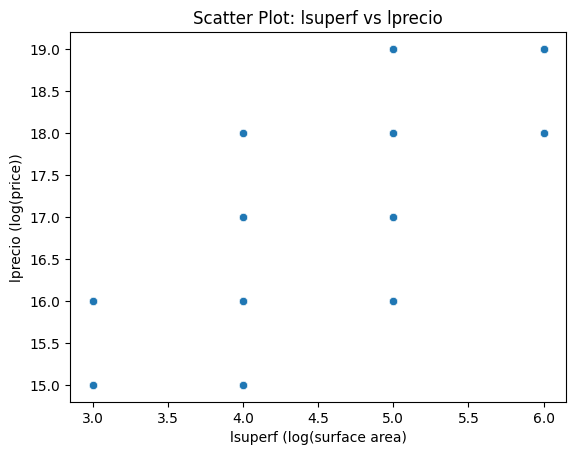

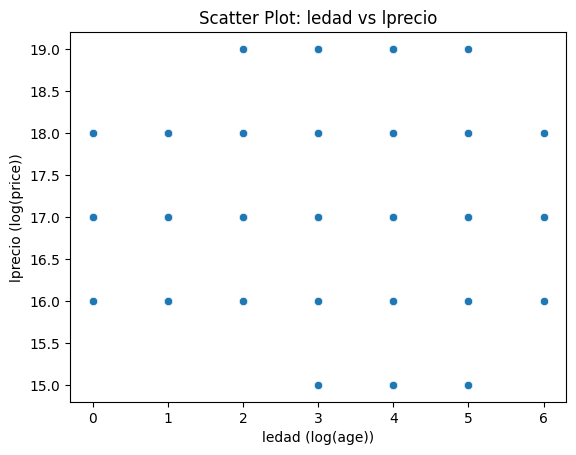

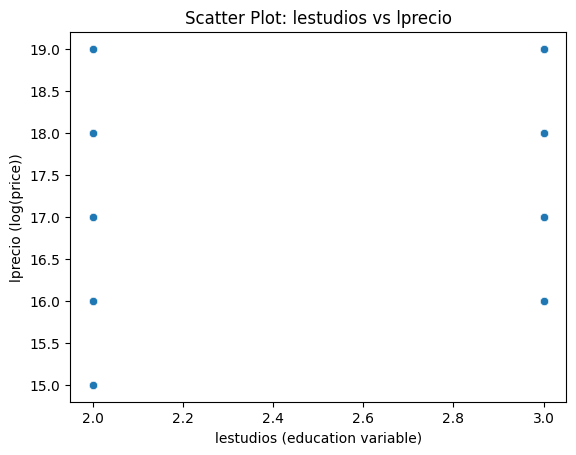

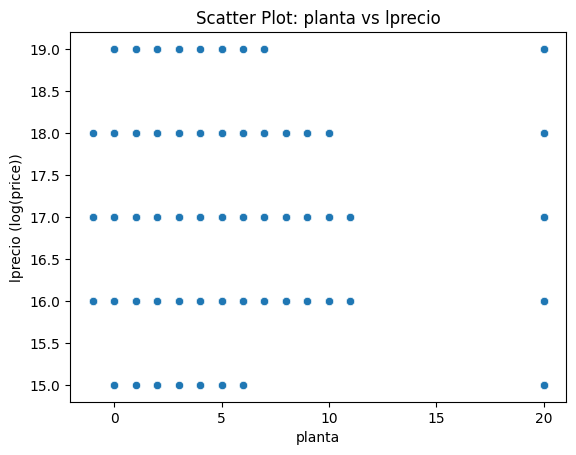

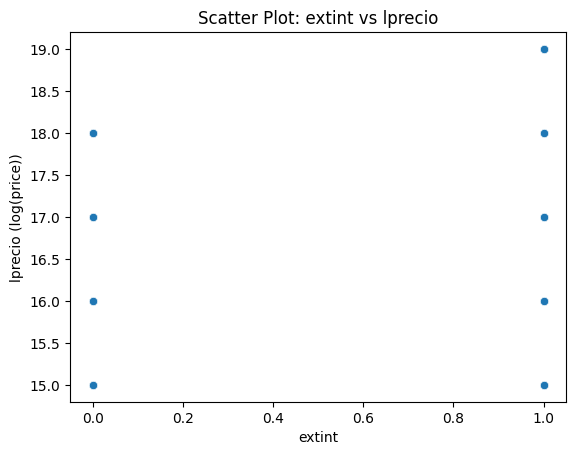

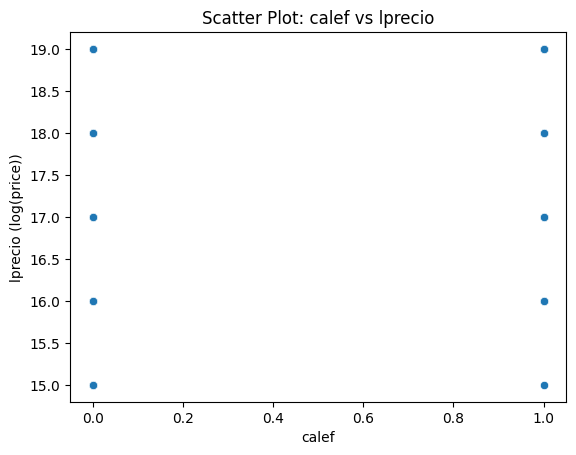

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot for lsuperf
sns.scatterplot(x='lsuperf', y='lprecio', data=df)
plt.title('Scatter Plot: lsuperf vs lprecio')
plt.xlabel('lsuperf (log(surface area)')
plt.ylabel('lprecio (log(price))')
plt.show()

# Scatter plot for ledad
sns.scatterplot(x='ledad', y='lprecio', data=df)
plt.title('Scatter Plot: ledad vs lprecio')
plt.xlabel('ledad (log(age))')
plt.ylabel('lprecio (log(price))')
plt.show()

# Scatter plot for lestudios
sns.scatterplot(x='lestudios', y='lprecio', data=df)
plt.title('Scatter Plot: lestudios vs lprecio')
plt.xlabel('lestudios (education variable)')
plt.ylabel('lprecio (log(price))')
plt.show()

# Scatter plot for planta
sns.scatterplot(x='planta', y='lprecio', data=df)
plt.title('Scatter Plot: planta vs lprecio')
plt.xlabel('planta')
plt.ylabel('lprecio (log(price))')
plt.show()

# Scatter plot for extint
sns.scatterplot(x='extint', y='lprecio', data=df)
plt.title('Scatter Plot: extint vs lprecio')
plt.xlabel('extint')
plt.ylabel('lprecio (log(price))')
plt.show()

# Scatter plot for calef
sns.scatterplot(x='calef', y='lprecio', data=df)
plt.title('Scatter Plot: calef vs lprecio')
plt.xlabel('calef')
plt.ylabel('lprecio (log(price))')
plt.show()